### Exercise Week3

1. Load and display the image 'dog.jfif'. Save the image in png format.
2. *Suggest 2 ways and write codes to display 2 images simultaneously.* You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.
3. Write codes that performs the following:
    * Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
    * Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"
4. Enlarge the image "dog.jfif" by using different techniques:
    1) Linear interpolation
   2) Cubic interpolation
   3) Nearest neighbor interpolation.

Perform profiling on each method. Comment on the **execution times** and **quality of resulting images**.

In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np

# Make sure that OpenCV optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

In [4]:
#Q1
# Load the image
image_path = "E:\Assignment\Mini Project\week 3\codes\images\dog.jfif"
dog_image = cv.imread(image_path)

# Display the image
cv.imshow('Dog Image', dog_image)
cv.waitKey(0)
cv.destroyAllWindows()

# Save the image in png format
cv.imwrite('dog.png', dog_image)

<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\kohyu\AppData\Local\Temp\ipykernel_31836\1934939197.py:2: SyntaxWarning: invalid escape sequence '\A'
  image_path = 'E:\Assignment\Mini Project\week 3\codes\images\dog.jfif'


True

In [8]:
#Q2 Method1:Covert original image to grayscale image using opencv
# Load the color image
image_path = "E:\Assignment\Mini Project\week 3\codes\images\soccer.jpg"
color_image = cv.imread(image_path)

# Convert to grayscale
gray_image = cv.cvtColor(color_image, cv.COLOR_BGR2GRAY)

# Display the images in separate windows
cv.imshow('Color Image', color_image)
cv.imshow('Grayscale Image', gray_image)

cv.waitKey(0)
cv.destroyAllWindows()

<>:3: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\A'
C:\Users\kohyu\AppData\Local\Temp\ipykernel_31836\3339699493.py:3: SyntaxWarning: invalid escape sequence '\A'
  image_path = "E:\Assignment\Mini Project\week 3\codes\images\soccer.jpg"


<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
C:\Users\kohyu\AppData\Local\Temp\ipykernel_31836\3890088587.py:4: SyntaxWarning: invalid escape sequence '\A'
  image_path = "E:\Assignment\Mini Project\week 3\codes\images\soccer.jpg"


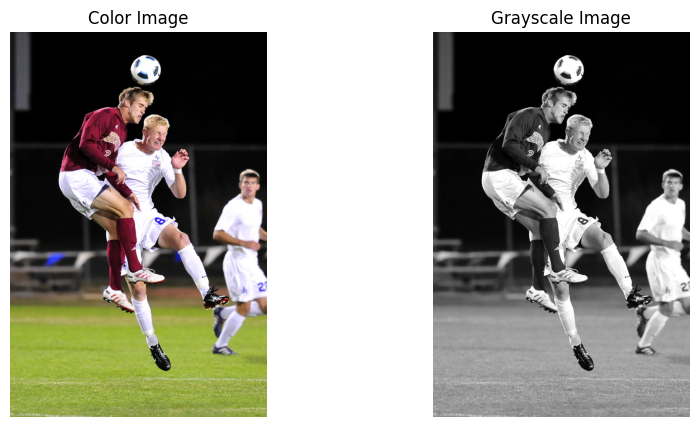

In [10]:
#Q2 Method2:Using Matplotlib Subplots
import matplotlib.pyplot as plt

# Load the color image
image_path = "E:\Assignment\Mini Project\week 3\codes\images\soccer.jpg"
color_image = cv.imread(image_path)

# Convert to grayscale
gray_image = cv.cvtColor(color_image, cv.COLOR_BGR2GRAY)

# Display the images using subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Color image
axs[0].imshow(cv.cvtColor(color_image, cv.COLOR_BGR2RGB))
axs[0].axis('off')
axs[0].set_title("Color Image")

# Grayscale image
axs[1].imshow(gray_image, cmap='gray')
axs[1].axis('off')
axs[1].set_title("Grayscale Image")

plt.show()

In [18]:
#Q3
# Load the video
video_path = "videos\img_pexels.mp4"
cap = cv.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    raise Exception("Error opening video file")

# Get frame width and height and set new dimensions
frame_width = int(cap.get(3) * 0.5)  # Resize to 50% of original
frame_height = int(cap.get(4) * 0.5)  # Resize to 50% of original
frame_rate = 20  

# Define the codec and create VideoWriter object
output_path = 'path_to_save/smaller_img_pexels.avi'
out = cv.VideoWriter("videos/output.avi", cv.VideoWriter_fourcc('M', 'J', 'P', 'G'), frame_rate, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        # Resize the frame
        resized_frame = cv.resize(frame, (frame_width, frame_height))
        
        # Display the resized frame
        cv.imshow('Resized Video', resized_frame)
        
        # Write the resized frame to the output file
        out.write(resized_frame)
        
        # Press Q on keyboard to exit
        if cv.waitKey(1) & 0xFF == 27:
            break
    else:
        print("Can't receive frame")
        break

# Release the video capture and writer objects
cap.release()
out.release()

# Close all OpenCV windows
cv.destroyAllWindows()

<>:3: SyntaxWarning: invalid escape sequence '\i'
<>:3: SyntaxWarning: invalid escape sequence '\i'
C:\Users\kohyu\AppData\Local\Temp\ipykernel_31836\2959565642.py:3: SyntaxWarning: invalid escape sequence '\i'
  video_path = "videos\img_pexels.mp4"


In [20]:
#4
import time

# Load the image
image_path = 'images/dog.jfif'
dog_image = cv.imread(image_path)

# Define the scale factor
scale_factor = 2

# Enlarge using Linear Interpolation
start_time = time.time()
linear_resized = cv.resize(dog_image, (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv.INTER_LINEAR)
linear_time = time.time() - start_time

# Enlarge using Cubic Interpolation
start_time = time.time()
cubic_resized = cv.resize(dog_image, (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv.INTER_CUBIC)
cubic_time = time.time() - start_time

# Enlarge using Nearest Neighbor Interpolation
start_time = time.time()
nearest_resized = cv.resize(dog_image, (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv.INTER_NEAREST)
nearest_time = time.time() - start_time

# Display the images
cv.imshow('Linear Interpolation', linear_resized)
cv.imshow('Cubic Interpolation', cubic_resized)
cv.imshow('Nearest Neighbor Interpolation', nearest_resized)

cv.waitKey(0)
cv.destroyAllWindows()

# Print the execution times
print(f"Linear Interpolation Time: {linear_time:.5f} seconds")
print(f"Cubic Interpolation Time: {cubic_time:.5f} seconds")
print(f"Nearest Neighbor Interpolation Time: {nearest_time:.5f} seconds")

Linear Interpolation Time: 0.00100 seconds
Cubic Interpolation Time: 0.00263 seconds
Nearest Neighbor Interpolation Time: 0.00000 seconds
